#### Numpy로 퍼셉트론을 구현해보자.

*   퍼셉트론으로 AND, NAND, OR 연산 구현해보도록 합니다.
*   다층 퍼셉트론으로 XOR 연산 구현해보도록 합니다.
*   본 코드는 '밑바닥부터 시작하는 딥러닝' 2장 예제 코드 입니다.


In [1]:
import numpy as np #numpy : Numerical python 선형대수학적 처리. as 별명

## AND 연산 퍼셉트론 구현

In [2]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) #초기값 설정.
    b = -0.7 #절편 : -0.7
    tmp =  np.sum(w * x) + b # y = sum((w^T*X)+b)
    if tmp <= 0: #tmp가 0보다 작거나 같으면 이 조건문 에 걸림
        return 0 #반환값을 0
    else: #tmp >0 :else에 작동
        return 1 #반환값을 1로 주세요.
 
data = []  #data는 빈칸으로 만들어 놓고.  
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    data.append(xs)
    print(data[0])
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0)
(0, 0) -> 0
(0, 0)
(1, 0) -> 0
(0, 0)
(0, 1) -> 0
(0, 0)
(1, 1) -> 1


### NAND 연산 퍼셉트론 구현

In [3]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp =  np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### OR 연산 퍼셉트론 연산

In [4]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([2, 2])
    b = -1
    tmp =  np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


### XOR 연산 다층 퍼셉트론 구현

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print("NAND, OR, AND")
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

NAND, OR, AND
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# 텐서플로우(Tensorflow) (https://www.tensorflow.org/))

- 데이터 흐름 그래프(data flow graph)를 상요하여 수치 연산을 하는 오픈 소스 소프트웨어 프레임워크입니다.

- 혹은 Numpy 같은 다양한 라이브러리를 묶어 놓은 패키지라고 할 수 있음.

- 구글 브레인 팀의 연구자와 엔지니어들이 개발을 하였음.

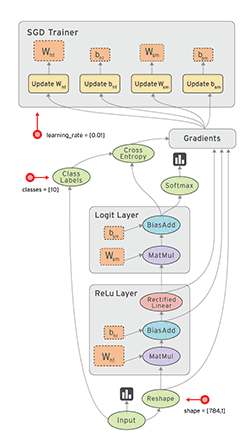


## 특징

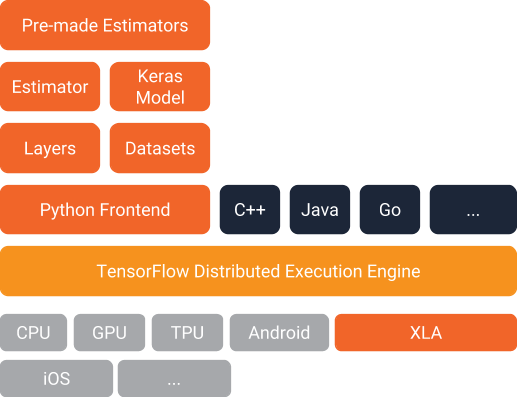

- 코드 수정 없이 데스크톱, 서버 혹은 모바일 디바이스에서 CPU나 GPU를 사용하여 연산을 구도할 수 있음.

- 분산(distributed) 환경에서 실행 가능함.

- 단순한 아이디어 테스트부터 서비스 단계까지 모두 이용 가능함.

- 참고 할것. https://www.tensorflow.org/

## Tensor(텐서) 

- 컴퓨터 과학에서 배열(array)는 번호(index)와 각 번호에 대응하는 값들로 데이루어진 데이터 형태

- 간단히 말해, 다차원의 배열을 통칭
- 여러 차원을 가진 배열

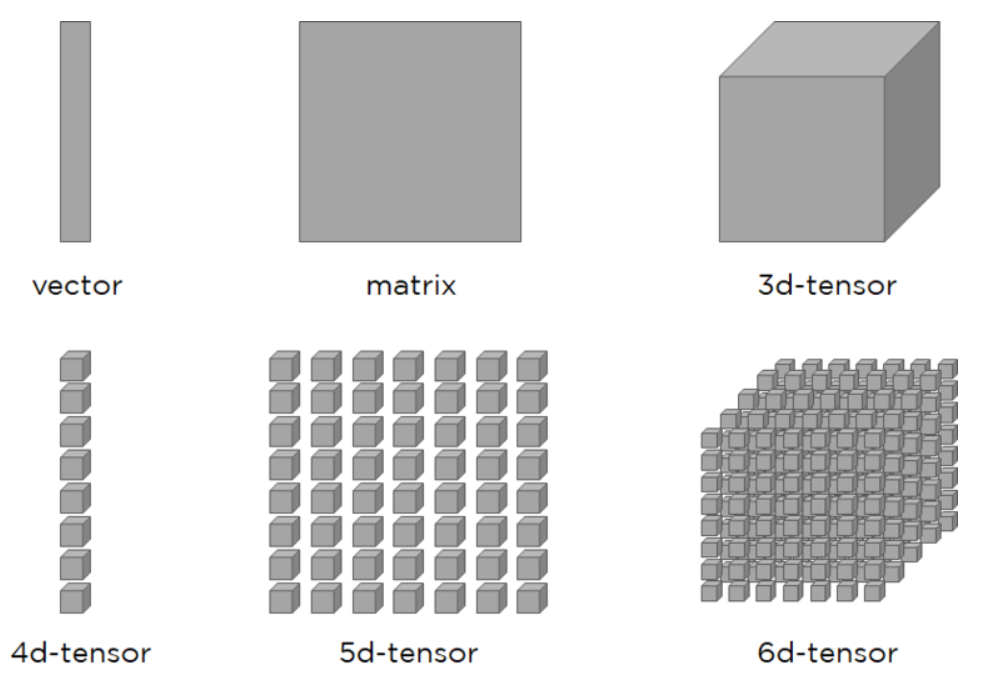

- local 컴퓨터에 tensorflow 설치 참고 : https://chancoding.tistory.com/5

In [6]:
# import tensorflow 
import tensorflow as tf
print(tf.__version__)

2.9.2


#### Constant와 Variable
#####Constant
  - 상수를 뜻함. 변하지 않고 고정된 값을 의미함.


##### Variable
 - 변수를 뜻함. 변수는 수학에서 투입값에 따라 변하는 숫자를 의미함. 

 - 하지만, 텐서플로의 Variable은 Constant와 큰 차이가 없습니다.
  

In [ ]:
# constant
c1 = tf.constant(1)
c2 = tf.constant([1])
c3 = tf.constant([[1, 2], [3, 4]])
print('c1의 값입니다\n',c1)
print('c2의 값입니다\n',c2)
print('c3의 값입니다\n',c3)

# variable
v1 = tf.Variable(1)
v2 = tf.Variable([1])
v3 = tf.Variable([[-1, 0], [10, 5]])
print('v1의 값입니다\n',v1)
print('v2의 값입니다\n',v2)
print('v3의 값입니다\n',v3)

- A scalar i known as as rank 0 tensor. Because it has no dimensions(it's just a number)

In [ ]:
scalar  = tf.constant(7)

# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the number of dimensions of our vector tensor
vector.ndim

1

In [ ]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

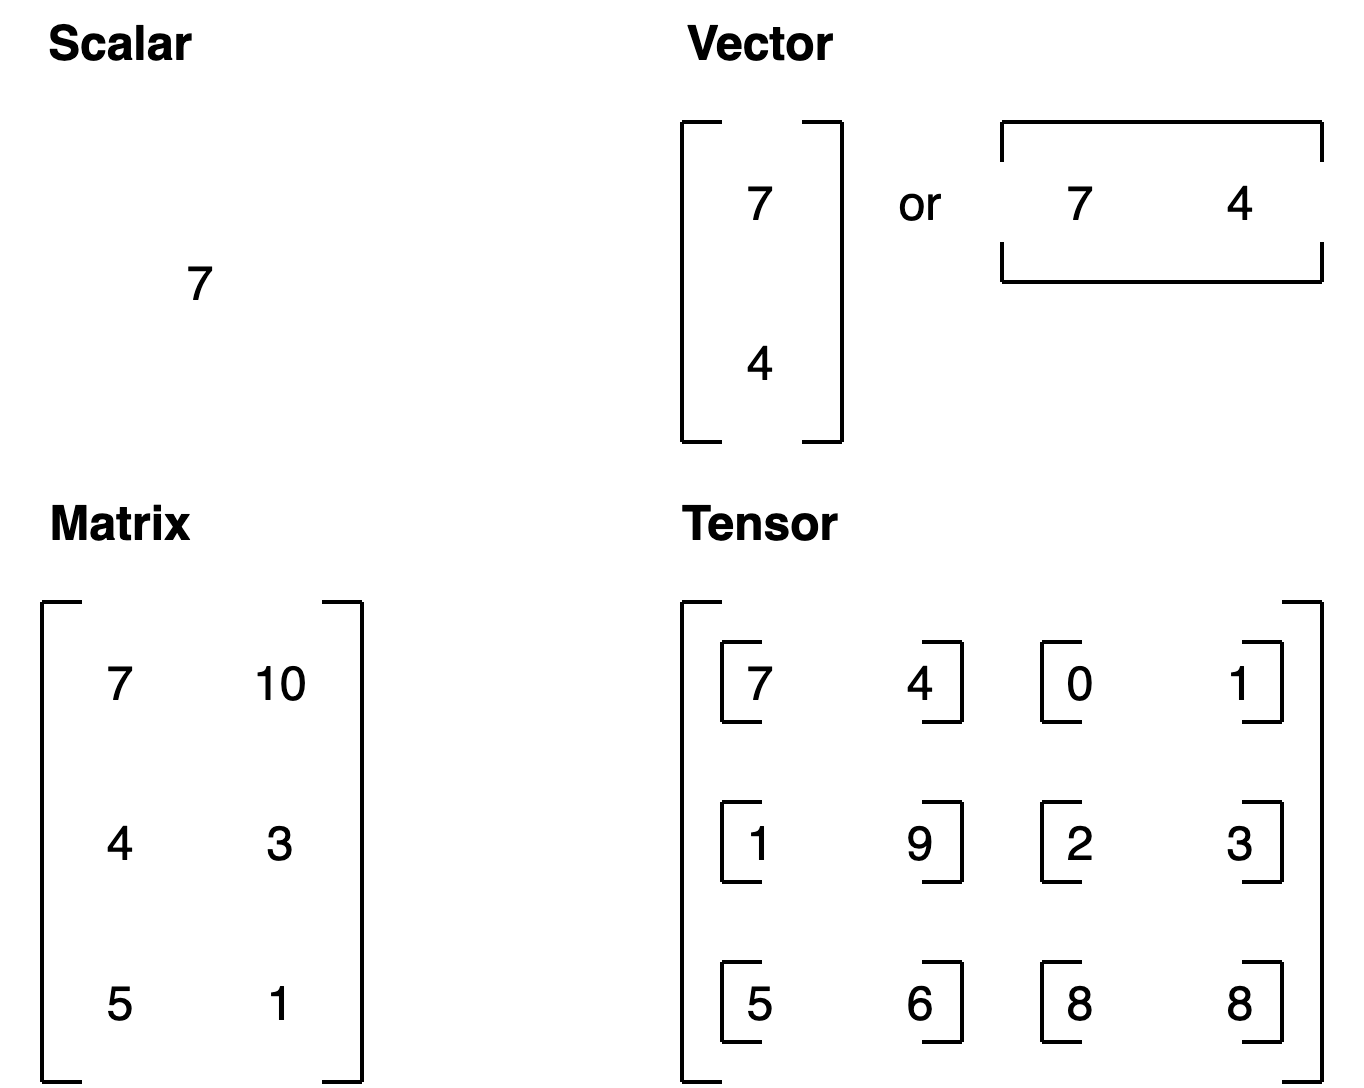

- tf.Variable()
 - 값이 변할 수도 있는 변수를 만들 때 사용.

In [ ]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

In [ ]:
# Won't error
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

케라스란

누구나 쉽게 사용하고 접 할 수 있도록 파이썬으로 설계된 머신러닝 라이브러리

1. 단순성 및 간결성(Simplicity)
 - 케라스의 표현은 짧고 간결.
2. 유연성(Easy Extensibility)
 - 케라스는 텐서플로와 높은 호환성을 가짐.
3. 모듈화(Modularity)
 - 케라스에서 사용 가능한 모든 모듈은 독립적으로 문제에 맞게 정의할 수 있으며, 이에 적합한 모델을 구성

4. 파이썬 기반(Python base)
 - 쉽게 접근할 수 있다는 장점을 보유한 파이썬 코드르르 통해 작동.



1. 학습 데이터를 준비합니다. -> Data preparing, Precessing
2. 문제를 해결하기 위한 모델의 정의함 ->Model(Sequential, Function API)
3. 손실 함수(Loss), 옵티마이저(Optimizer)를 설정함 ->compile()
4. 모델을 학습시키고, 추론 -> fit(), evaluate(), prdict()

@tf.function은 텐서플로우에서 자동으로 그래프를 생성(Auto graph)해주는 기능. 이 기능을 사용하면 파이썬으로 구성된 코드를 고효율의 텐서플로우 그래프로 변환하여 사용할 수 있습니다.

In [ ]:
import tensorflow as tf

In [ ]:
# tf.function을 사용하지 않은 함수
def square_pos(x):
  if x>0:
    x = x * x
  else : 
    x = x* -1
  return x
square_pos

<function __main__.square_pos(x)>

In [ ]:
# tf.function을 사용하는 함수
@tf.function 
def square_pos(x):
  if x>0:
    x = x * x
  else : 
    x = x* -1
  return x
square_pos

In [ ]:
import tensorflow as tf

tf.random.set_seed(777) # 시드를 설정 함.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #(fully connected)
from tensorflow.keras.optimizers import SGD #(Stochastic gradient descent)
from tensorflow.keras.losses import mse #(mean square error)

# 데이터 준비하기
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

#모델 구성하기
model = Sequential()

#단층 퍼셉트론을 구성
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))

#모델 준비하기
model.compile(optimizer = 'SGD',
              loss = mse,
              metrics = ['acc']) #list형태로 평가지표를 전달
#학습시키기
model.fit(x,y,epochs = 500)

In [ ]:
model.get_weights()

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

## Activation Functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [ ]:
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np


## data 선언
x_data = [[0.,0.], [0.,1.], [1.,0.],[1.,1.]]
y_data = [[1.], [0.], [0.], [1.]]

## tf.keras를 활용한 perceptron 모델 구현.
input_Layer = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation='sigmoid')(input_Layer)
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary() # 층을 쌓은걸 볼수 있다.

# 모델 loss, 학습 방법 결정하기
optimizer=tf.keras.optimizers.SGD(lr=0.7) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.binary_crossentropy  ## 예측값 과 정답의 오차값 정의. mse는 mean squre error로 (예측값 - 정답)^2 를 의미
metrics=tf.keras.metrics.binary_accuracy ### 학습하면서 평가할 메트릭스 선언언

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=100, batch_size=4)
#batch_size ->gpu 용량이 적다->OOM(out of memory)
# model.fit(x_data,y_data, epochs=1000,)


In [ ]:
import tensorflow as tf

tf.random.set_seed(777) # 시드를 설정 함.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

# XOR gate이기 때문에 y값은 0,1,1,0임

#모델 구성하기

model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation = 'relu')) # 32개로 여러개로 쌓음.
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델 준비하기

model.compile(optimizer = 'adam',
              loss = mse,
              metrics = ['acc']) #list형태로 평가지표를 전달

#학습시키기

model.fit(x,y,epochs = 500)

## 학습률에 따른 경사하강법(백견불여일타 책 참고)

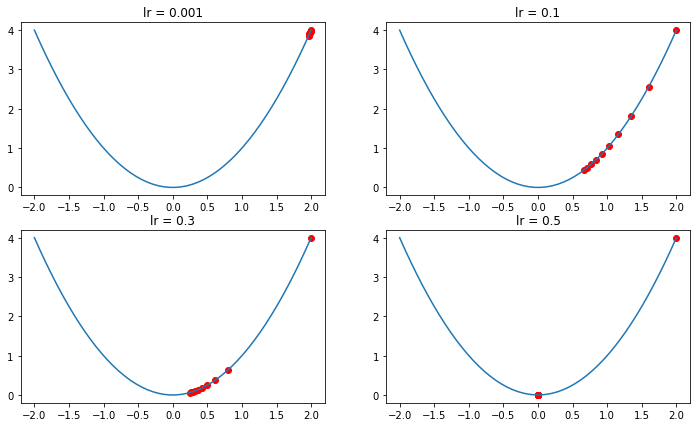

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.1, 0.3, 0.5]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의함.

  for i in range(1,10):
    #먼저 해당 위치에서 미분값을 구함

    dev_value = w_old **2

    #위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) #업데이트 된 가중치를 저장 함,.
    y.append(w_old ** 2) #업데이트 된 가중치의 손실값을 저장 함.

  return derivative, y

x = np.linspace(-2,2,50) 
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i,lr in enumerate(lr_list):
  derivative, y =get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()

## MNIST Dataset with perceptron(백견불여일타 책 참고)

In [ ]:
# MNIST 데이터를 다운로드 한다.
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


[ 4235 21089 20851 38601 56484  1004 54074  3190 54791 10589]


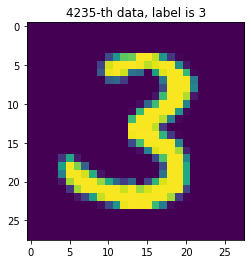

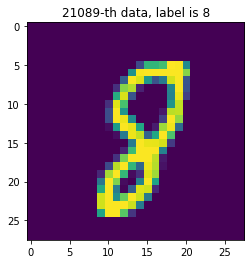

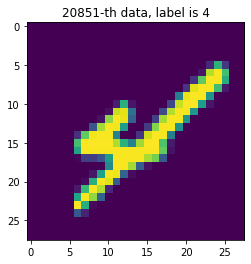

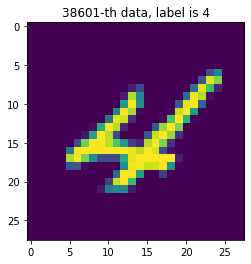

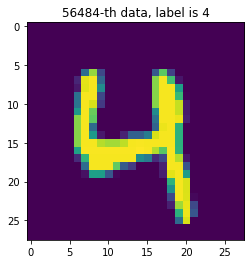

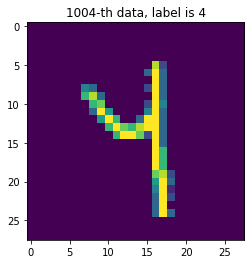

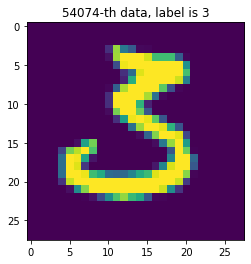

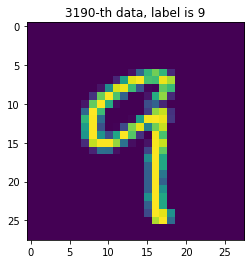

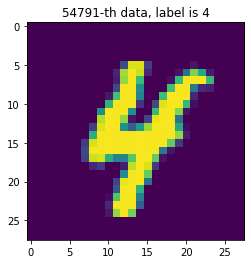

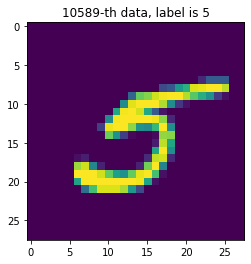

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 10
# 0~59999이 범위에서 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size = sample_size)

print(random_idx)

for idx in random_idx:
  img = X_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [ ]:
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

In [ ]:
# 검증 데이터 만들기
#sklearn : machine learning package
from sklearn.model_selection import train_test_split

#훈련/테스트 데이터를 0.7/0.3 의 비율로 분리

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state =777) # test size는 테스트셋의 비율 의미. random_state는 재산성을 위해 사용(random_seed와 동일)

print(f'훈련 데이터 {X_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {X_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [ ]:
X_train.shape[0]

42000

In [ ]:
num_X_train = X_train.shape[0] #42000 
num_X_val = X_val.shape[0]  #18000
num_X_test = X_test.shape[0] #10000

#모델에 입력하기 전 전처리 과정.
X_train = (X_train.reshape((num_X_train, 28*28))) / 255
# X_train = (X_train.reshape((60000, 28*28)))/ 255
X_val = (X_val.reshape((num_X_val, 28*28))) / 255
X_test = (X_test.reshape((num_X_test, 28*28)))/ 255

print(X_train.shape)  # 모델 입력을 위해 데이터를 784차원으로 변경 / np.Flatten()

(42000, 784)


In [ ]:
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

(28,28) 형태의 데이터를 784차원의 1차원 배열로 변환 한것을 볼 수 있다. 신경망은 입력 데이터의 스케일에 매우 민감하므로 적절한 전처리 과정이 필수.

이에 대한 큰 이유로는 그래디언트 손실과 그래디언트 폭발로 인해 학습이 진행되지 않기 때문. 우리가 숫자 이미지 데이터는 각 픽셀 값이 0~255의 범위에 있기 때문에 255로 나누어 줌.

**여러 가지의 전처리 방법- 스케일링 방법**

Normalization(Min Max) :  $X$ = ${\dfrac {x-x_{min}}{x_{max}-x_{min}}}$

Robust Normalization :  $X$ = ${\dfrac {x-x_{2/4}}{x_{3/4}-x_{1/4}}}$

Standardization : $X$ = ${\dfrac {x-x_{mean}}{x_{std}}}$

In [ ]:
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

#각 데이터의 레이블을 범주형 형태로 변경.
num_classes=10

y_train = to_categorical(y_train,num_classes)
y_val = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_train.shape

(42000, 10, 10)

## Softmax 함수

- 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.

<img src='https://mblogthumb-phinf.pstatic.net/MjAxNzA2MDVfNDMg/MDAxNDk2NTkwNTY2Njcx.-soSHRQ2urRoHGkkQk-OmHJ1HJIvpS3YuO1SXeecBAQg.LVPXD-PxQ5o8mK9uPMkqvp18vwjyKUypfRfYlqTv_B8g.JPEG.wideeyed/softmax_f.jpg?type=w2'>

<img src='https://resources.codeonweb.com/bucket/cached/3d/eb/3debe13595e70edb78dfe62fe562688a.png'>

In [ ]:
# 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#입력 데이터의 형태를 명시해야됨.
# 784 차원의 데이터를 입력을 받고, 64개의 출력을 가지는 첫번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [ ]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m #exp의 오버플로우 방지  참고 : https://mkmehpp.tistory.com/2
  arr = np.exp(arr)
  return arr/ np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [ ]:
# from tensorflow.keras.utils import to_categorical

# #각 데이터의 레이블을 범주형 형태로 변경.

# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
# y_test = to_categorical(y_test)

# print(y_train)

범주형 형태로 바뀌기 귀찮다 -> loss = 'sparse_categorical_crossentropy'

binary -> loss = 'binary_crossentropy'

In [ ]:
# 학습과정 설정하기.
model.compile(optimizer = 'adam', #옵티마이저 : Adam
              #손실함수 : categorical_crossentropy
              loss = 'categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

In [ ]:
# 모델 학습하기
history = model.fit(X_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (X_val,y_val),
                    verbose=1)

Epoch 1/30
329/329 [==============================] - 4s 5ms/step - loss: 1.8520 - acc: 0.4623 - val_loss: 1.1480 - val_acc: 0.6854
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.8626 - acc: 0.7496 - val_loss: 0.6976 - val_acc: 0.7945
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.6199 - acc: 0.8142 - val_loss: 0.5588 - val_acc: 0.8382
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.5148 - acc: 0.8488 - val_loss: 0.4803 - val_acc: 0.8609
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4521 - acc: 0.8677 - val_loss: 0.4352 - val_acc: 0.8732
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4137 - acc: 0.8791 - val_loss: 0.4034 - val_acc: 0.8839
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3869 - acc: 0.8862 - val_loss: 0.3823 - val_acc: 0.8917
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

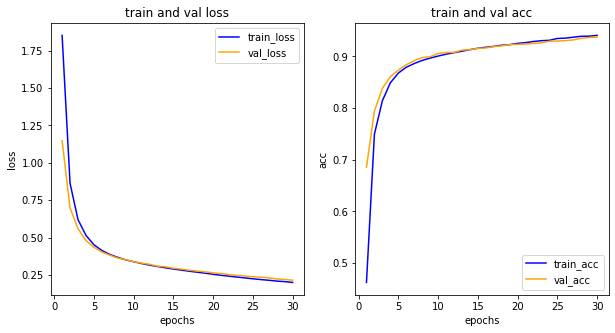

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()

In [ ]:
# 모델 평가하기

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2067 - acc: 0.9382


[0.20671923458576202, 0.9381999969482422]

In [ ]:
import numpy as np

results = model.predict(X_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 :  {results[0]}')

(10000, 10)
각 클래스에 속할 확률 :  [4.9312446e-05 3.2628691e-08 1.7733859e-03 5.3944145e-03 8.4401819e-09
 4.2440759e-05 1.0210852e-11 9.9233294e-01 4.6393325e-05 3.6105208e-04]


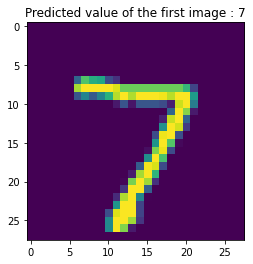

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) #  가장 큰 값의 인덱스를 가져옴
plt.imshow(X_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' +str(arg_results[0]))
plt.show()

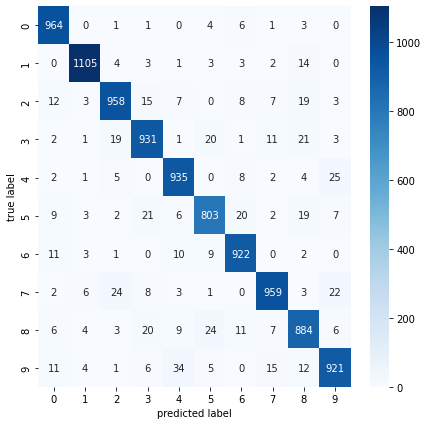

In [ ]:
#모델 평가 방법 1 -> 혼동행렬

#sklearn.metrics 모듈을 여러 가지 평가지표에 관한 기능을 제공함.

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#혼동행렬을 만듬.->one-hot encoding
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98      0.97      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.93      0.92      0.92      1010
           4       0.93      0.95      0.94       982
           5       0.92      0.90      0.91       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.90      0.91      0.90       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## 3.1 MNIST

이번 장에서는 필기체 숫자로 이루어진 'MNIST 데이터베이스'를 이용해 필기체 숫자 분류를 해보자. MNIST는 미국 인구조사국으 지기원들이 쓴 숫자와 고등학생들이 쓴 숫자로 만든 미국 국립표준기술연구소(NIST)의 데이터베이스를 다시 섞어 만든 필기체 숫자 이미지 데이터베이스이다. 

MNIST 데이터는 딥러닝 예제에서 빠지지 않고 등장하는 데이터라고 할 수 있다. 

![](./images/mnist.png)

### SetUp

In [ ]:
# 공통
import os
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# warning 문구 무시하기 위함
import warnings
warnings.filterwarnings(action='ignore')

### MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
X = np.vstack((train_x, test_x))
X = X.reshape([-1, 28*28])

y = np.append(train_y, test_y)

print('X.shape :', X.shape)
print('y.shape :', y.shape)

X.shape : (70000, 784)
y.shape : (70000,)


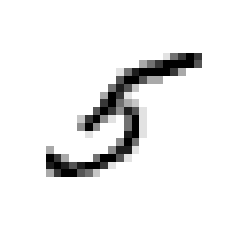

In [ ]:
some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

MNIST 데이터셋을 Train Set과 Test Set을 나누어 보자.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (60000, 784)
X_test.shape : (10000, 784)
y_train.shape : (60000,)
y_test.shape : (10000,)


## 3.2 이진 분류기 훈련

문제를 단순화하기 위해 하나의 숫자 5만 식별하는 분류기를 구현해보자. 숫자가 5인지 아닌지를 분류하는 **이진 분류기**(binary classifier)를 분류 해본다.

In [ ]:
y_train_5 = (y_train == 5)  # 5는 True, 다른 숫자는 False
y_test_5 = (y_test == 5)

In [ ]:
np.where(y_train == 5)

(array([    8,    11,    25, ..., 59928, 59942, 59965]),)

이제 Scikit-Learn의 `SGDClassifier`를 이용해 분류기를 구현해보도록 하자. `SGDClassifier`는 **확률적 경사 하강법**(Stochastic Gradient Descent)을 이용한 Linear classifiers (SVM, logistic regression, a.o.)이다. 디폴트 값으로는 `loss='hinge'`이며, linear SVM을 이용해 분류기를 학습한다.

`SGDClassifier`는 매우 큰 데이터셋을 효율적으로 처리하는 장점이 있다. 

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [ ]:
# some_digit = X[35]
sgd_clf.predict([some_digit])

array([False])

## 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.964 , 0.9579, 0.9571])

아래의 예제코드는 위의 `cross_val_score`과 같은 기능을 하는 교차 검증 기능을 `StratifiedKFold`를 이용해 직접 구현한 코드이다. `StratifiedKFold`는 클래스별 비율이 유지되도록 폴드(Fold)를 만들기 위해 계층적 샘플링을 수행한다. 

출력 결과는 위의 결과와 동일한 결과가 출력된다.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)
skfolds = StratifiedKFold(n_splits=3, random_state=None)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)  # sgd_clf 복제
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.964
0.9579
0.9571


모든 이미지를 `5가 아님`으로 분류하는 더미 분류기를 만들어 보자.

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

위의 결과에서 알 수 있듯이, 모든 숫자를 `5가 아님`으로 분류해도 정확도가 90% 이상이다. 그 이유는 전체 데이터셋 중 10% 정도만이 숫자 5이기 때문이다.

따라서, 정확도(accuracy)를 성능 측정 지표로 사용하는 것은 **불균형한 데이터셋**을 다룰 때 유용하지 않다.

### 3.3.2 오차 행렬 (Confusion Matrix)

분류기(classifier)의 성능을 평가하는 더 좋은 방법은 오차행렬(confusion matrix)를 살펴보는 것이 좋다.

- **TP** : True-Positive, 1이라고 예측했는데, 실제로도 1인 경우 → **정답**
- **TN** : True-Negative, 0이라고 예측했는데, 실제로도 0일 경우 → **정답**
- **FP** : False-Positive, 1이라고 예측했는데, 실제로는 0인 경우
- **FN** : False-Negative, 0이라고 예측했는데, 실제로는 1인 경우

![](./images/confusion_matrix.jpg)

`cross_val_predict()`는 K-Fold CV를 수행하면서 score값이 아닌 각 테스트 폴드(test fold)에서 얻은 예측 값을 반환한다.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

In [ ]:
y_train_pred.shape

(60000,)

`confusion_matrix()`에서 행은 **실제 클래스**를 나타내고 열은 **예측한 클래스**를 나타낸다.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred )

array([[54058,   521],
       [ 1899,  3522]])

In [ ]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

### 3.3.3 정밀도와 재현율 

#### Precision (정밀도)

- 모델이 Positive라고 예측한 것들 중 True Positive(TP)인 비율

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8711352955725946

#### Recall (재현율)

- 실제 True인 데이터 중(TP + FN)에 모델이 정확하게 맞춘(TP)의 비율

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6496956281128943

#### $\text{F}_{1}$ Score

$$
\text{F}_{1} = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7442941673710904

### 3.3.4 정밀도/재현율 Trade-Off

- 정밀도(Precision)과 재현율(Recall)은 서로 Trade-off 관계를 가짐

- 예를들어, 고객에게 추천할 항목이 줄어들어도 정확한 항목을 추천하려면, 정밀도가 높은 모델이 좋으며

- 불량품을 걸러낼 때는, 정상인 품목이 어느정도 포함되더라도 재현율이 높은 모델이 좋음

![](./images/tradeoff.png)

- `sklearn`에서 분류기의 `decision_function()`을 사용하면 각 샘플(데이터포인트)의 sore를 얻을 수 있음

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-9737.0785024])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores < threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = -200000
y_some_digit_pred = (y_scores < threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
y_scores.shape

(60000,)

In [ ]:
y_scores

array([-545086.1906455, -200238.2063272, -366873.7617279, ...,
       -626454.8445428, -716313.7493135, -581950.0460115])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

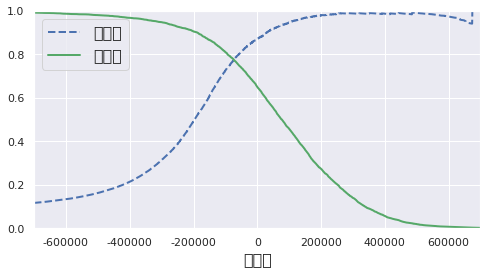

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

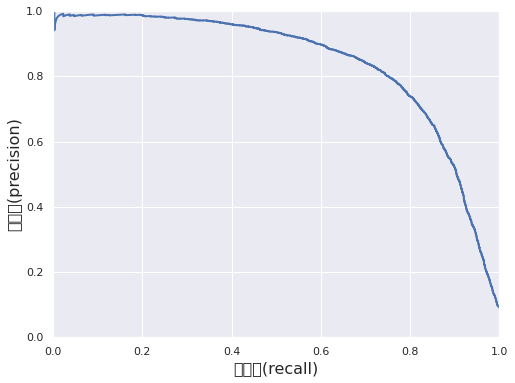

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율(recall)", fontsize=16)
    plt.ylabel("정밀도(precision)", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

Precision/Recall Trade-off는 위의 그래프에서 하강점 직전, 즉 0.6(60%) 지점을 선택하는 것이 좋다. 물론 이러한 선택은 프로젝트에 따라 다르다.

만약, 정밀도(Precision)을 90% 달성하는 것이 목표라고 하면, 임계값(threshold)을 조정하여 구할 수 있다.

In [ ]:
y_train_pred_90 = (y_scores > 110000)
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9520383693045563

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4394023242944106

하지만, 위의 결과에서도 볼 수 있듯이, 정밀도가 올라가면 재현율은 떨어지기 마련이다. 따라서, 정밀도가 높지만 재현율이 낮은 분류기는 유용하지 않다.

> 누군가가 '99% 정밀도를 달성하자'라고 하면 반드시 '재현율 얼마에서?'라는 질문을 던져야 한다!

### 3.3.5 ROC 곡선

ROC(Receiver Operating Characteristic, 수신자 조작 특성)곡선 또한 이진 분류에서 주로 사용한다. ROC 곡선은 **False-Positive Rate(FPR)** 에 대한 **True-Positive Rate(TPR = Recall)** 의 곡선이다. 

FPR은 1에서 TNR(True-Negative Rate)를 뺀 값과 같다. TNR은  **특이도**(Specificity)라고도 한다.

$$
FPR = \frac{FP}{FP + TN} = \frac{FP + TN - TN}{FP + TN} = 1 - \frac{TN}{FP + TN} = 1 - TNR
$$

따라서, ROC 곡선은 **민감도(재현율, Recall)** 에 대한 **1 - 특이도** 그래프이다.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

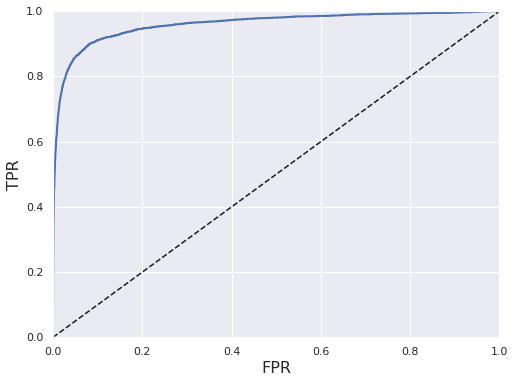

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

위의 ROC 곡선에서도 trade-off가 있다. 재현율(TPR, Recall)이 높을수록 FPR이 증가한다. 점선은 랜덤한 분류기의 ROC곡선을 의미하며, 성능이 좋은 분류기는 점선에서 부터 최대한 멀리 떨어져야한다(왼쪽 위 모서리).

**AUC**(Area Under the Curve)을 측정하면 분류기들을 성능을 비교할 수 있다. AUC는 1에 가까울 수록 좋은 분류기이다.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9598058535696421

아래의 코드는 SGDClassifier와 RandomForestClassifier의 ROC 곡선과 AUC를 비교하는 코드이다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # 점수는 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

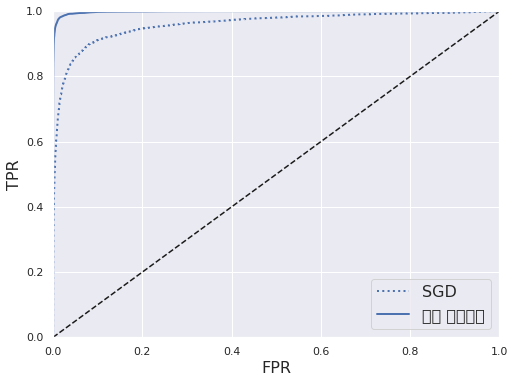

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983631764491033

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9890893831305078

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8695812580704667

## 3.4 다중 분류

다중 분류(multiclass/multinomial classification)는 말그대로 둘 이상의 클래스로 분류하는 것을 말한다.

RandomForest나 Naive Bayes같은 알고리즘은 알고리즘에서 직접 다중 분류가 가능하지만, SVM이나 Logistic Regression같은 알고리즘은 이진 분류(binary classification)만 가능하다. 

하지만, 이러한 이진 분류 알고리즘을 여러 번 사용해 다중 클래스를 분류할 수 있는 기법(트릭)이 있다. 

#### OvA(One versus All, One versus the rest, OvR)

**OvA(일대다)** 방법은 예를 들어, MNIST 데이터에서 특정 숫자 하나만 분류하는 (1인지 아닌지?, 2인지 아닌지?) 이진 분류기를 10개 만들어 그 중 가장 높은 확률(점수)값을 가지는 클래스로 분류해주는 방법이다.

![](./images/ovr.png)

#### OvO(One versus One)

**OvO(일대일)** 방법은 0과 1, 0과 2, 1과 2 구별 등과 같이 각 클래스의 조합마다 이진 분류기를 만들어 학습시키는 방법이다. 이 방법은 클래스가 $N$개인 경우 $\frac{N \times \left( N-1 \right)}{2}$ 개가 필요하다.

$$
\binom{N}{2} = \frac{N!}{2! \left(N-2\right)!} = \frac{N \times \left( N-1 \right)}{2}
$$ 

MNIST의 경우에는 45개의 분류기를 만들어 가장 많이 Positive로 분류된 클래스를 선택한다. 

SVM같은 알고리즘은 Train Set의 크기에 민감하기 때문에 작은 Train Set에서 여러개의 분류기를 학습시키는 것이 빠르기 때문에 OvO를 사용하지만, 대부분의 이진 분류 알고리즘은 OvA를 사용한다.

Scikit-Learn에서는 이진 분류 알고리즘을 이용해 다중 분류를 수행할 경우 자동으로 OvA(또는 SVM일 경우 OvO)를 적용해 학습한다.

In [ ]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-316862.8330171, -126087.5711512, -323328.0153372,
        -172686.0883052, -151770.5145894,  125765.878306 ,
        -532184.2002291, -505026.022637 ,  -68942.927758 ,
        -426178.3083723]])

In [ ]:
np.argmax(some_digit_scores)

5

Scikit-Learn에서 OvO나 OvA를 사용하도록 `OneVsOneClassifier`나 `OneVsRestClassifier`를 이용해 지정할 수 있다. 

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(max_iter=5, random_state=42))

In [ ]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
len(ovo_clf.estimators_)

45

RandomForest 같은 알고리즘은 알고리즘 자체에서 다중 클래스로 분류할 수 있기 때문에 OvA, OvO 같은 방법이 필요하지 않다. 

In [ ]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.  , 0.03, 0.  , 0.95, 0.  , 0.  , 0.01, 0.  ]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83935, 0.85125, 0.8676 ])

#### StandardScaler를 이용해 데이터 스케일 조정하기

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91155, 0.91005, 0.9095 ])

## 3.5 에러 분석

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5722,    2,   28,    9,    8,   49,   51,   11,   41,    2],
       [   2, 6494,   47,   23,    6,   42,    5,   10,  100,   13],
       [  51,   37, 5360,   88,   82,   23,   96,   56,  149,   16],
       [  51,   37,  149, 5318,    2,  248,   37,   57,  134,   98],
       [  19,   25,   39,    8, 5378,    7,   54,   29,   77,  206],
       [  73,   42,   35,  170,   73, 4622,  105,   30,  177,   94],
       [  31,   24,   43,    2,   43,   88, 5635,    4,   47,    1],
       [  20,   20,   65,   27,   58,   11,    6, 5806,   12,  240],
       [  53,  147,   78,  164,   11,  163,   56,   24, 5017,  138],
       [  42,   27,   25,   87,  175,   34,    3,  201,   85, 5270]])

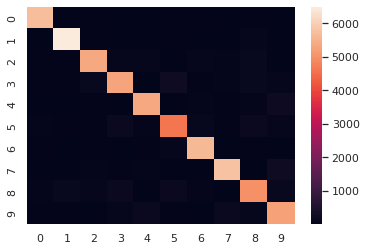

In [ ]:
sn.heatmap(conf_mx);

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

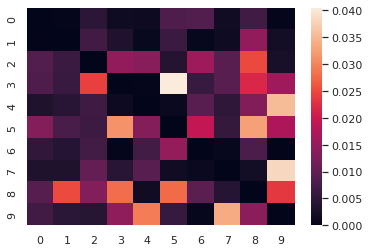

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
sn.heatmap(norm_conf_mx);

In [ ]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

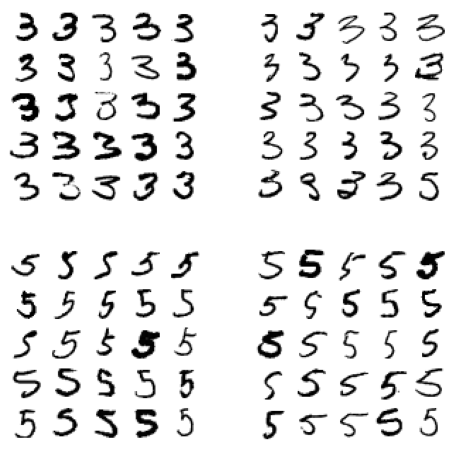

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 3.6 다중 레이블 분류

위에서 살펴본 내용은 데이터가 하나의 클래스에만 분류되는 경우만 살펴보았다. 하지만, 데이터에 따라 여러개의 클래스에 분류해야하는 경우가 있다. 이러한 경우를 **다중 레이블 분류**(multilabel classification)이라고 한다.

아래의 예제는 `kNN`알고리즘을 이용한 `KNeighborClassifier` 분류기를 사용해 첫번째 클래스는 7보다 크거나 같은지(`>=7`), 두 번째 클래스는 홀수(odd)인지를 분류하는 다중 레이블 분류 예제이다. 

![](./images/multiclass_multilabel.png)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])  # == 5

array([[False,  True]])

In [ ]:
%%time
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

0.9768224011622285
CPU times: user 742 ms, sys: 229 ms, total: 971 ms
Wall time: 2min 10s


## 3.7 다중 출력 분류

- 아래의 예제는 MNIST 이미지에 대해 노이즈를 추가한 뒤 노이즈를 제거하는 분류기를 통해 다중출력 분류(multioutput calssification) 예시를 만듦

- 분류기의 출력이 multi-label(픽셀당 한 레이블)이고 각 레이블은 여러개의 값을 가짐(0 ~ 255 픽셀)

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

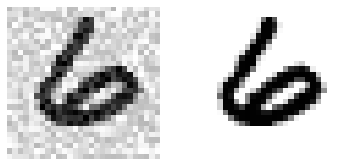

In [ ]:
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

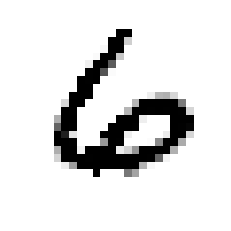

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

## HW) Fashion MNIST에서도 동일하게 해보자.

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

multi-classification -> label->one hot encoding을 해야하는 것인가? or 데이터를 전처리 해야되는가?

encoding->loss = 'categorical_crossentropy'
encoding X ->loss = 'sparse_categorical_crossentropy'

In [ ]:
#데이터 전처리

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# 데이터 plot
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for i in range(25):
  # print(i) #i=0 subplot(5,5,0) : 불가능. 25칸이 있는데, 0번부터 찍어주세요.
  plt.subplot(5,5,i+1) #i는 0부터 시작하기 때문에.
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary) #gray_scale이기 때문에.
  plt.xlabel(class_names[train_labels[i]])
plt.show() #전체를 누적해서 그려주세요.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

model = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
model.fit(train_images, train_labels, epochs= 10, validation_split = 0.1)

# 정확도 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose = 2) # verbose = 0 아무것도 안보임
# verbose = 1 progress bar / verbose :2 결과만

313/313 - 1s - loss: 0.3391 - acc: 0.8842 - 537ms/epoch - 2ms/step


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.2220789e-09, 3.3803509e-08, 6.4108276e-06, 6.5753644e-05,
       1.3053486e-04, 2.2918606e-04, 6.5201730e-06, 4.0617385e-03,
       7.0517599e-05, 9.9542928e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  #image내에 array : pixel을 가져 오는 것 img : 실제 이미지이고, predictions_array->예측 한것 (데이터로 부터)
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary) #gray_scale

  predicted_label = np.argmax(predictions_array) 
  #predictions_array->예측 한것 (데이터로 부터)->최대인 label을 뽑아주세요.
  if predicted_label == true_label: #예측한 라벨 == 실제 라벨
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") #hex color : 색의 혼합.
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

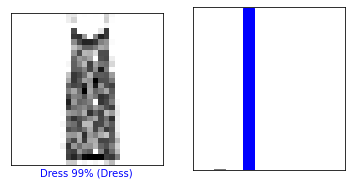

In [ ]:
i = 300
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

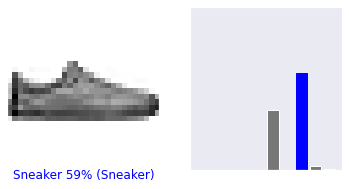

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

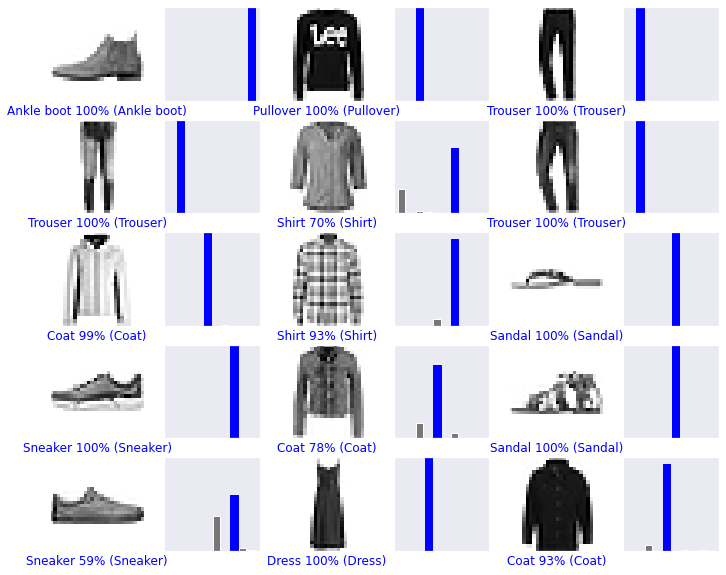

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
#plt.figure(figsize = (10,10))
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1) #i=0부터 출발하니깐, i+1
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2) # 그 옆에 hist를 그려주세요.
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.4677790e-06 3.6497349e-07 1.6568776e-09 1.3906544e-11 1.0606241e-09
  1.4388007e-04 4.6429258e-07 2.2098334e-03 8.9731600e-08 9.9764282e-01]]


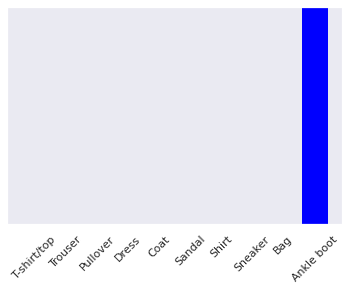

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

- IMDB 이진 분류  하기
 - 인터넷 영화 데이터베이스로부터 가져온 5만 개의 리뷰,25000개의 훈련데이터, 25000개의 테스트 데이터로 나뉘어 졌고, 각각 50%의 부정리뷰, 50% 긍정 리뷰로 구성되어 있음.
 - num_words : 훈련 데이터에서 가장 자주 나타는 단어 1만개만 사용

In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

## 데이터 준비
 - 숫자 리스트는 신경망에 들어갈 수가 없기 때문에 리스트를 텐서로 바꿔줘야 한다.원-핫 인코딩을 통해 0과 1의 벡터로 변환하는 방법.

In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    result = np.zeros((len(sequences), dimension))
    # 크기가 len(sequences, dimension) 이고 모든 원소가 0인 행렬 생성.
    for i,sequences in enumerate(sequences):
        result[i,sequences] = 1.0 #result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return result

In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype(float)
y_test = np.asarray(test_labels).astype(float)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

imdb = Sequential()

imdb.add(Dense(64, activation = 'relu', input_shape = (10000, ) ) )
imdb.add(Dense(32, activation = 'relu')) 
imdb.add(Dense(1, activation = 'sigmoid'))
imdb.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640064    
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
imdb.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])

- 훈련 검증

In [ ]:
X_valid = X_train[:10000]
partial_X_train = X_train[10000:]
y_valid = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
hist_imb = imdb.fit(partial_X_train,partial_y_train,epochs=50,
                    batch_size=512, validation_data=(X_valid,y_valid))

Epoch 1/50
30/30 [==============================] - 3s 42ms/step - loss: 0.4822 - accuracy: 0.7779 - val_loss: 0.3258 - val_accuracy: 0.8821
Epoch 2/50
30/30 [==============================] - 1s 20ms/step - loss: 0.2589 - accuracy: 0.9071 - val_loss: 0.4231 - val_accuracy: 0.8174
Epoch 3/50
30/30 [==============================] - 1s 21ms/step - loss: 0.1895 - accuracy: 0.9330 - val_loss: 0.2816 - val_accuracy: 0.8875
Epoch 4/50
30/30 [==============================] - 1s 20ms/step - loss: 0.1447 - accuracy: 0.9501 - val_loss: 0.3203 - val_accuracy: 0.8747
Epoch 5/50
30/30 [==============================] - 1s 20ms/step - loss: 0.1109 - accuracy: 0.9629 - val_loss: 0.3664 - val_accuracy: 0.8718
Epoch 6/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0836 - accuracy: 0.9727 - val_loss: 0.3400 - val_accuracy: 0.8784
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0635 - accuracy: 0.9805 - val_loss: 0.4404 - val_accuracy: 0.8664
Epoch 8/50
30

In [ ]:
loss, accuracy = imdb.evaluate(X_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.9494 - accuracy: 0.8502
